> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data set analyzed in this notebook is the TMDB Movies Database. This data set originiated from Kaggle and provided by Udacity. There is information on more than 5000 movies. The information used below is popularity, revenue, bugdet, and runtime. The information chosen from the data set is to dive into what metrics are good for figuring out how to measure a movies' success. 

 


In [54]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline


/home/aurora/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # surppresses scietific notation

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data = pd.read_csv('../tmdb-movies.csv')


In [4]:
#This allows us to look inside of the dataset
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


In [5]:
data.shape #returns how many rows and column of the dataset

(10866, 21)

In [6]:
data.describe() #returns statistics about the numerical columns

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000
mean,66064.177,0.646,14625701.094,39823319.793,102.071,217.390,5.975,2001.323,17551039.823,51364363.253
std,92130.137,1.000,30913213.831,117003486.582,31.381,575.619,0.935,12.813,34306155.723,144632485.040
min,5.000,0.000,0.000,0.000,0.000,10.000,1.500,1960.000,0.000,0.000
25%,10596.250,0.208,0.000,0.000,90.000,17.000,5.400,1995.000,0.000,0.000
50%,20669.000,0.384,0.000,0.000,99.000,38.000,6.000,2006.000,0.000,0.000
75%,75610.000,0.714,15000000.000,24000000.000,111.000,145.750,6.600,2011.000,20853251.084,33697095.717
max,417859.000,32.986,425000000.000,2781505847.000,900.000,9767.000,9.200,2015.000,425000000.000,2827123750.412


> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [7]:
# Putting all of the columns that will be used in a new data set
movie_data = data[['popularity', 'budget', 'revenue','runtime','genres']]

In [8]:
#checks the new data set
movie_data.shape 

(10866, 5)

In [9]:
#takes the rows with NAN out
clean_mdata = movie_data.dropna() 

In [10]:
#Now we take a peak at the clean and shortened dataset
clean_mdata.describe()

,popularity,budget,revenue,runtime
count,10843.000,10843.000,10843.000,10843.000
mean,0.647,14656724.439,39907792.389,102.138
std,1.001,30938637.671,117113132.251,31.293
min,0.000,0.000,0.000,0.000
25%,0.208,0.000,0.000,90.000
50%,0.385,0.000,0.000,99.000
75%,0.715,15000000.000,24136754.000,111.000
max,32.986,425000000.000,2781505847.000,900.000


In [11]:
# drop if there are duplicates, just in case
clean_mdata = clean_mdata.drop_duplicates()

In [12]:
clean_mdata = clean_mdata[(clean_mdata != 0).all(1)]

In [13]:
#take another peak
clean_mdata.head()

,popularity,budget,revenue,runtime,genres
0,32.986,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller
1,28.420,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller
2,13.113,110000000,295238201,119,Adventure|Science Fiction|Thriller
3,11.173,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy
4,9.335,190000000,1506249360,137,Action|Crime|Thriller


In [38]:
#function which will take any column as argument from and keep its track 
def add_genre(column):
    #will take a column, and separate the string by '|'
    data = clean_mdata[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count


In [39]:
#variable to store the retured value
genre_count = add_genre('genres')


In [16]:
# Formula for gross profit: Revenue - Budget
clean_mdata['gross_profit'] = clean_mdata['revenue'] - clean_mdata['budget']

In [17]:
clean_mdata.head()


,popularity,budget,revenue,runtime,genres,gross_profit
0,32.986,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,1363528810
1,28.420,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,228436354
2,13.113,110000000,295238201,119,Adventure|Science Fiction|Thriller,185238201
3,11.173,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,1868178225
4,9.335,190000000,1506249360,137,Action|Crime|Thriller,1316249360


In [44]:
genre_profit = genre_count.copy()
for genre in genre_count.keys():
    has_genre = clean_mdata['genres'].str.contains(genre)
    genre_profit[genre] = clean_mdata['gross_profit'][has_genre].mean()

#ax = genre_profit.plot(kind='bar', title='Avg Gross Profit By Genre')
#ax.set_ylabel('Avg Gross Profit')
#ax.set_xlabel('Genres')

Text(0.5,10.256,'Movie Genres')

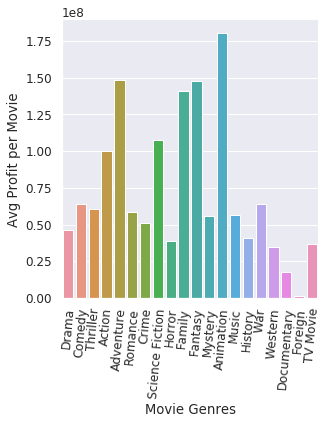

In [45]:
sns.set(font_scale=1.1)
sns.set_style('darkgrid')
gp = genre_profit.to_frame('profit')
gp.reset_index(level=0, inplace=True)
gp.columns = ['genre', 'profit']
plot = sns.catplot(x='genre', y='profit', kind='bar', data=gp)
plot.set_xticklabels(rotation=85)
plot.fig.get_axes()[0].set_ylabel('Avg Profit per Movie')
plot.fig.get_axes()[0].set_xlabel('Movie Genres')

In [56]:
#Defining these variables here to see a statisitcal correlation under 
#bivariate analysis.
pop = clean_mdata['popularity']
ygp = clean_mdata['gross_profit']

xgen = clean_mdata['genres']
xrev = clean_mdata['revenue']
xbudget = clean_mdata['budget']

## Exploratory Data Analysis



### Research Question 1 (What is the relationship between popularity of a movie and it's budget?)

Text(0,0.5,'popularity')

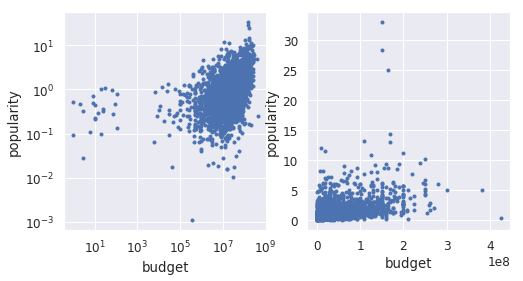

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.plot(clean_mdata['budget'], clean_mdata['popularity'], '.')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('budget')
ax1.set_ylabel('popularity')
ax2.plot(clean_mdata['budget'], clean_mdata['popularity'], '.')
ax2.set_xlabel('budget')
ax2.set_ylabel('popularity')

In [ ]:
pearsonr(xbudget, pop)

### Research Question 2  (Is there an association between a movies' revenue and how popular it is?)

In [ ]:
# A scatter Plot for popularity and revenue

Text(0,0.5,'popularity')

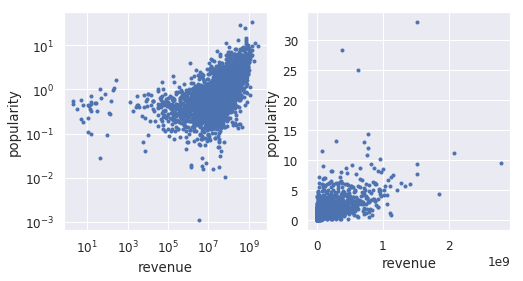

In [47]:
#clean_mdata.plot(x='revenue',y='popularity',kind='scatter')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.plot(clean_mdata['revenue'], clean_mdata['popularity'], '.')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('revenue')
ax1.set_ylabel('popularity')
ax2.plot(clean_mdata['revenue'], clean_mdata['popularity'], '.')
ax2.set_xlabel('revenue')
ax2.set_ylabel('popularity')

In [48]:
pearsonr(xrev, pop)

(0.6155346545546607, 0.0)

### Research Question 3  (Is there a relationship between genre and gross profit?)

In [103]:
#gp.head()
#type(gp['genre'])
type(gp)

pandas.core.frame.DataFrame

In [97]:
from scipy import stats
 
F, p = stats.f_oneway(clean_mdata['genres'], clean_mdata['gross_profit'])
print(F)
print(p)

ValueError: could not convert string to float: 'Action|Adventure|Science Fiction|Thriller'

<a id='conclusions'></a>
## Conclusions



> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!